In [6]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json

# Load datasets
graduates_data = pd.read_csv('../data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('../data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
# P_N = students_data['P_N']  # Liczba studentów
P_N = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

# Convert selected columns with numeric strings to float
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB', 'P_CZAS']):
        graduates_data[col] = graduates_data[col].astype(str).str.replace(',', '.')
        graduates_data[col] = pd.to_numeric(graduates_data[col], errors='coerce')


/tmp/ipykernel_4347/3397959169.py:9: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('../data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_4347/3397959169.py:10: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory=False.
  students_data = p

In [7]:
# Function to map a field to a category based on keywords
def add_field_column(dataframe, column_name):
    """
    Add a new column 'Dziedzina' to the given DataFrame based on keywords in the specified column.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column containing course names.

    Returns:
        pd.DataFrame: The updated DataFrame with the new 'Dziedzina' column.
    """
    # Dictionary mapping phrases to fields
    keywords_to_dziedzina = {
        "Prawo": "Nauki prawne",
        "Psychol": "Psychologia",
        "Automat": "Automatyka",
        "Informat": "Informatyka",
        "Zarządzanie": "Zarządzanie",
        "lekarski": "Kierunek lekarski",
        "Ekonom": "Ekonomia",
        "Mechani": "Inżynieria mechaniczna",
        "Chem": "Chemia",
        "Budowni": "Inżynieria lądowa",
        "Archit": "Architektura",
        "Elektr": "Inżynieria elektryczna",
        "środowi": "Inżynieria środowiskowa",
    }
    
    # Function to assign a field based on keywords
    def assign_field(course_name):
        for keyword, field in keywords_to_dziedzina.items():
            if keyword.lower() in course_name.lower():  # Check if keyword exists in the course name
                return field
        return "Inne"  # Assign "Inne" if no match is found

    # Apply the function to create the new column
    dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)

    return dataframe

# Apply the function to the graduates_data DataFrame
graduates_data = add_field_column(graduates_data, 'P_KIERUNEK_NAZWA')

/tmp/ipykernel_4347/2849430647.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)


In [8]:
def add_adjusted_salary_columns(data, median_dict):
    """
    Adds columns to the graduates_data DataFrame where the value is
    P_ME_ZAR_P1 through P_ME_ZAR_P5 divided by the median salary based on the year in P_ROKDYP.

    Args:
        data (pd.DataFrame): The graduates_data DataFrame.
        median_dict (dict): A dictionary containing median salaries for specific years.

    Returns:
        pd.DataFrame: The updated DataFrame with the new columns.
    """
    # Define the corresponding salary and new column suffixes
    salary_columns = [f"P_ME_ZAR_P{i}" for i in range(1, 6)]
    adjusted_columns = [f"P_WWZ_P{i}" for i in range(1, 6)]

    # Function to calculate the adjusted salary for a specific column
    def calculate_adjusted_salary(row, salary_column, offset):
        year = row['P_ROKDYP'] + offset
        if year in median_dict:
            return row[salary_column] / median_dict[year]
        return None  # Return None if the year is not in the median dictionary

    # Loop through each salary column and create the corresponding adjusted column
    for i, (salary_col, adjusted_col) in enumerate(zip(salary_columns, adjusted_columns), start=1):
        offset = i  # P_ME_ZAR_P1 corresponds to +1 year, P_ME_ZAR_P2 to +2 years, etc.
        data[adjusted_col] = data.apply(lambda row: calculate_adjusted_salary(row, salary_col, offset), axis=1)

    return data

# Define the median dictionary
median = {
2014: 3291.56,
2015: 3401.11,
2016: 3510.67,
2017: 3802.82,
2018: 4094.98,
2019: 4398.82,
2020: 4702.66,
2021: 5202.14,
2022: 5701.62,
2023: 6100.81,
2024: 6500.00
}

# Add the new column to graduates_data
graduates_data = add_adjusted_salary_columns(graduates_data, median)

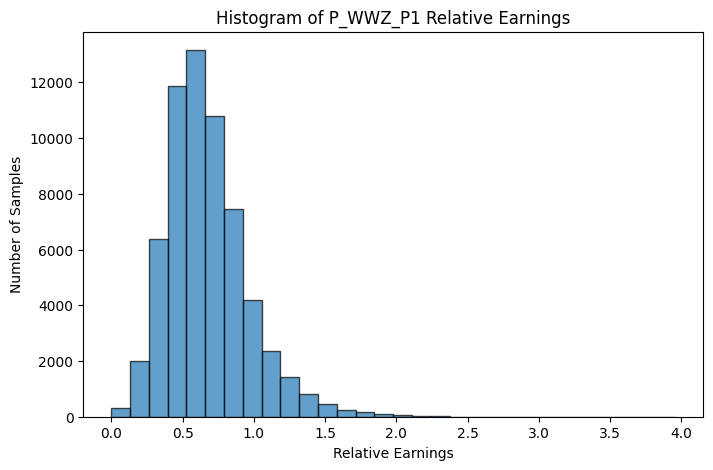

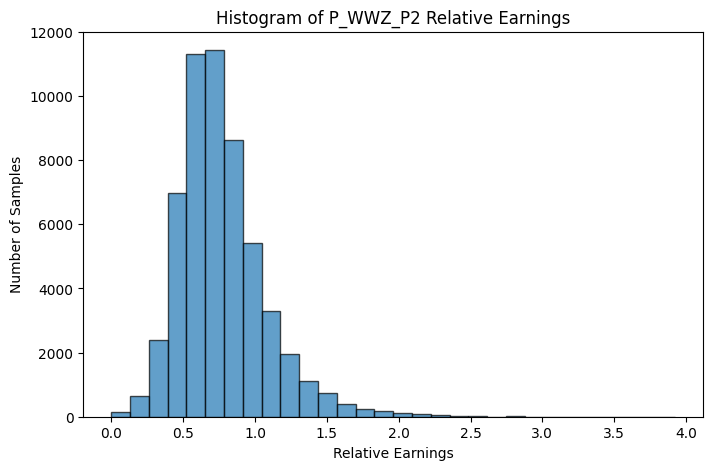

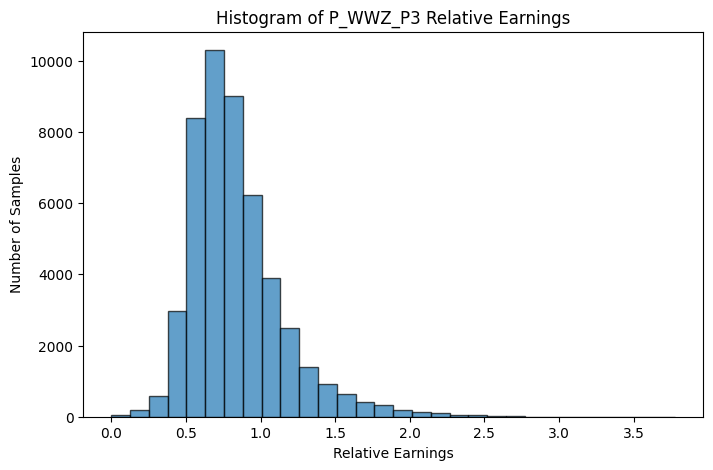

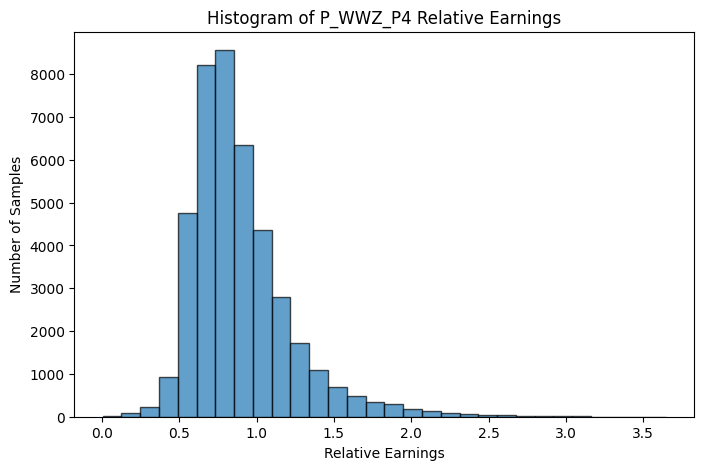

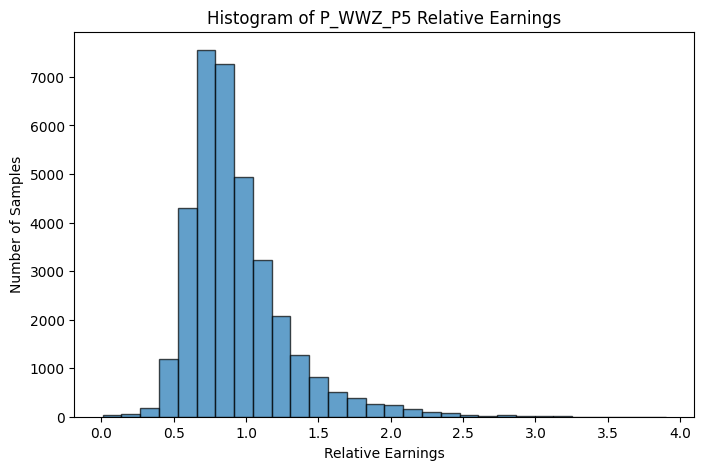

In [9]:
def plot_relative_salary_histograms(data, column_prefix="P_WWZ_P"):
    """
    Plots histograms for the relative salary columns (e.g., P_WWZ_P1 to P_WWZ_P5).

    Args:
        data (pd.DataFrame): The DataFrame containing the relative salary columns.
        column_prefix (str): The prefix of the columns to plot (default is 'P_WWZ_P').

    Returns:
        None: Displays the histograms.
    """
    # Import necessary libraries
    import matplotlib.pyplot as plt

    # Loop through the columns P_WWZ_P1 to P_WWZ_P5
    for i in range(1, 6):
        column = f"{column_prefix}{i}"
        if column in data.columns:
            # Drop NaN values for the current column
            column_data = data[column].dropna()

            # Plot the histogram
            plt.figure(figsize=(8, 5))
            plt.hist(column_data, bins=30, edgecolor='black', alpha=0.7)

            # Set plot labels and title
            plt.xlabel("Relative Earnings")
            plt.ylabel("Number of Samples")
            plt.title(f"Histogram of {column} Relative Earnings")

            # Show the plot
            plt.show()

# Example usage
plot_relative_salary_histograms(graduates_data)


In [10]:
# Create a dictionary to store mappings for each column
label_mappings = {}

# Encode variables and save mappings
for column in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    graduates_data[column] = label_encoder.fit_transform(graduates_data[column])
    
    # Store the mapping: original value -> encoded value
    label_mappings[column] = {str(original): encoded for encoded, original in enumerate(label_encoder.classes_)}

# # Save mappings to a file (optional)
# import json
with open('label_mappings.json', 'w', encoding='utf-8') as f:
    json.dump(label_mappings, f, ensure_ascii=False, indent=4)

# Print the mappings
for column, mapping in label_mappings.items():
    print(f"Mapping for {column}:")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

Mapping for P_WOJ:
  2.0: 0
  4.0: 1
  6.0: 2
  8.0: 3
  10.0: 4
  12.0: 5
  14.0: 6
  16.0: 7
  18.0: 8
  20.0: 9
  22.0: 10
  24.0: 11
  26.0: 12
  28.0: 13
  30.0: 14
  32.0: 15
  nan: 16
Mapping for P_POZIOM:
  1: 0
  2: 1
  JM: 2
Mapping for P_FORMA:
  N: 0
  S: 1
Mapping for Dziedzina:
  Architektura: 0
  Automatyka: 1
  Chemia: 2
  Ekonomia: 3
  Informatyka: 4
  Inne: 5
  Inżynieria elektryczna: 6
  Inżynieria lądowa: 7
  Inżynieria mechaniczna: 8
  Inżynieria środowiskowa: 9
  Kierunek lekarski: 10
  Nauki prawne: 11
  Psychologia: 12
  Zarządzanie: 13


In [ ]:
import json

# Path to the .json file
file_path = 'label_mappings.json'

# Load the .json file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Now `data` is a regular Python dictionary
print(type(data))  # <class 'dict'>
print(data)

# Function to find a key based on a value
def get_key_from_value(mapping, value):
    reverse_mapping = {v: k for k, v in mapping.items()}
    return reverse_mapping.get(value, "Value not found")

# Example usage
value_to_find = 0
result = get_key_from_value(data['P_FORMA'], value_to_find)
print(result)

# MODELS

In [ ]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

year = 5

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', f'P_WWZ_P{year}']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy[f'P_WWZ_P{year}']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Custom Dataset
class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define your RegressionModel
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = RegressionModel(input_dim=len(categorical_features))

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
epochs = 50  # Number of epochs
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")


# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki w {year} roku po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Reszty")
plt.title("Wykres reszt")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


sns.histplot(residuals, kde=False)
plt.title("Rozkład reszt")
plt.xlabel("Reszty")
plt.ylabel("Częstotliwość")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()


In [76]:
def test_model(model, input_features, label_encoders):
    """
    Test the trained PyTorch model with a single set of input features.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (dict): Input features as a dictionary with keys:
            ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
        label_encoders (dict): Dictionary of LabelEncoders for categorical features.

    Returns:
        float: Predicted value for `P_WWZ_P2`.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Encode categorical input features
    encoded_features = []
    for feature, value in input_features.items():
        if feature in label_encoders:
            encoded_value = label_encoders[feature].transform([value])[0]
        else:
            encoded_value = value
        encoded_features.append(encoded_value)

    # Convert encoded features to a PyTorch tensor
    input_tensor = torch.tensor([encoded_features], dtype=torch.float32)

    # Make a prediction
    with torch.no_grad():
        prediction = model(input_tensor).numpy()[0, 0]

    return prediction

## Funkcje 

In [ ]:
# def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
#     """
#     Iteratively generate predictions for future_years beyond the known data.
    
#     Args:
#         model (nn.Module): The trained LSTM model.
#         known_wwz (list[float]): List of WWZ values for years 1..5.
#         woj, poziom, forma, dziedz (float): Encoded categorical features.
#         future_years (int): How many future years to predict (e.g., 5 => years 6..10).
    
#     Returns:
#         A list of predicted WWZ values for the next future_years.
#     """
#     model.eval()
    
#     # Initialize hidden and cell states
#     h = torch.zeros(model.num_layers, 1, model.hidden_dim)  # batch_size = 1
#     c = torch.zeros(model.num_layers, 1, model.hidden_dim)  # batch_size = 1
    
#     # "Warm up" the LSTM with years 1..4 so it reaches the state for year 5
#     for t in range(4):
#         x_t = torch.tensor([[
#             woj, poziom, forma, dziedz, t+1, known_wwz[t]
#         ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
#         # Forward pass through the LSTM
#         out, (h, c) = model.lstm(x_t, (h, c))
    
#     # LSTM is now at the state corresponding to year 5
#     wwz_5 = known_wwz[4]  # The known year-5 value
#     future_preds = []
#     prev_wwz = wwz_5
    
#     # Predict future years (6..(5 + future_years)) iteratively
#     for i in range(future_years):
#         t_future = 5 + i
#         x_t = torch.tensor([[
#             woj, poziom, forma, dziedz, t_future, prev_wwz
#         ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
#         out, (h, c) = model.lstm(x_t, (h, c))
#         pred = model.fc(out)  # shape: (1, 1, 1)
#         pred_value = pred.item()
#         future_preds.append(pred_value)
        
#         # Update prev_wwz for the next iteration
#         prev_wwz = pred_value
    
#     return future_preds


# def predict_future(model, row, future_years=5):
#     """
#     A helper function that retrieves the known data from a row,
#     then calls rollout_prediction to forecast future years.
    
#     Args:
#         model (nn.Module): Trained LSTM model.
#         row (pd.Series): A row containing 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#                          and 'P_WWZ_P1'..'P_WWZ_P5'.
#         future_years (int): Number of future years to forecast.
    
#     Returns:
#         A list of forecasted WWZ values for the next 'future_years'.
#     """
#     model.eval()
    
#     known_wwz = [
#         row['P_WWZ_P1'],
#         row['P_WWZ_P2'],
#         row['P_WWZ_P3'],
#         row['P_WWZ_P4'],
#         row['P_WWZ_P5']
#     ]
#     woj = row['P_WOJ']
#     poziom = row['P_POZIOM']
#     forma = row['P_FORMA']
#     dziedz = row['Dziedzina']
    
#     return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)

# # In this example, for each row, we have 5 time steps corresponding to:
# #   P_WWZ_P1 ... P_WWZ_P5
# # We will build sequences of length 4 for the model to predict the next step
# # (e.g., year t+1 based on year t), a so-called "many-to-many" approach in LSTM.

# def build_sequences(row):
#     """
#     Builds a sequence of length 4 (features) and 4 targets from a row.
    
#     For each time step t = 1..4:
#       Input (X_t) = [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_Pt]
#       Output (Y_t) = P_WWZ_P(t+1)
    
#     The result is a tuple:
#       - seq_input: shape (4, input_dim)
#       - seq_output: shape (4,)
#     """
#     woj = row['P_WOJ']
#     poziom = row['P_POZIOM']
#     forma = row['P_FORMA']
#     dziedz = row['Dziedzina']
    
#     # Retrieve the 5 known WWZ values: P_WWZ_P1..P_WWZ_P5
#     wwz_values = [
#         row['P_WWZ_P1'],
#         row['P_WWZ_P2'],
#         row['P_WWZ_P3'],
#         row['P_WWZ_P4'],
#         row['P_WWZ_P5']
#     ]
    
#     seq_input = []
#     seq_output = []
    
#     # Build 4 time steps: from t=1 to t=4
#     for t in range(4):
#         year_t = t + 1
#         x_t = [woj, poziom, forma, dziedz, year_t, wwz_values[t]]
#         seq_input.append(x_t)
        
#         # The target is the next year's WWZ -> wwz_values[t+1]
#         seq_output.append(wwz_values[t + 1])
    
#     return np.array(seq_input, dtype=np.float32), np.array(seq_output, dtype=np.float32)


# # ============================================
# # 2. Dataset and DataLoader
# # ============================================
# class GraduatesLSTMDataset(Dataset):
#     """
#     A custom PyTorch Dataset for LSTM-based time series.
#     """
#     def __init__(self, X, y):
#         # Convert numpy arrays to torch tensors
#         self.X = torch.from_numpy(X)
#         self.y = torch.from_numpy(y)
    
#     def __len__(self):
#         return self.X.shape[0]
    
#     def __getitem__(self, idx):
#         return self.X[idx], self.y[idx]

# train_dataset = GraduatesLSTMDataset(X_train, y_train)
# test_dataset  = GraduatesLSTMDataset(X_test, y_test)

# batch_size = 32
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## LSTM 1 warstwa skwara

Train size: 6621
Validation size: 2207
Test size: 2207
Epoch [1/10] - Train Loss: 0.1967, Val Loss: 0.0782
Epoch [2/10] - Train Loss: 0.0456, Val Loss: 0.0315
Epoch [3/10] - Train Loss: 0.0248, Val Loss: 0.0218
Epoch [4/10] - Train Loss: 0.0190, Val Loss: 0.0182
Epoch [5/10] - Train Loss: 0.0171, Val Loss: 0.0176
Epoch [6/10] - Train Loss: 0.0163, Val Loss: 0.0174
Epoch [7/10] - Train Loss: 0.0160, Val Loss: 0.0162
Epoch [8/10] - Train Loss: 0.0157, Val Loss: 0.0160
Epoch [9/10] - Train Loss: 0.0156, Val Loss: 0.0162
Epoch [10/10] - Train Loss: 0.0156, Val Loss: 0.0158

*** Final Evaluation on Test Set ***
Test MSE:  0.0158
Test RMSE: 0.1255
Test MAE:  0.0855
Test MAPE: 0.0928
Test R^2:  0.9095


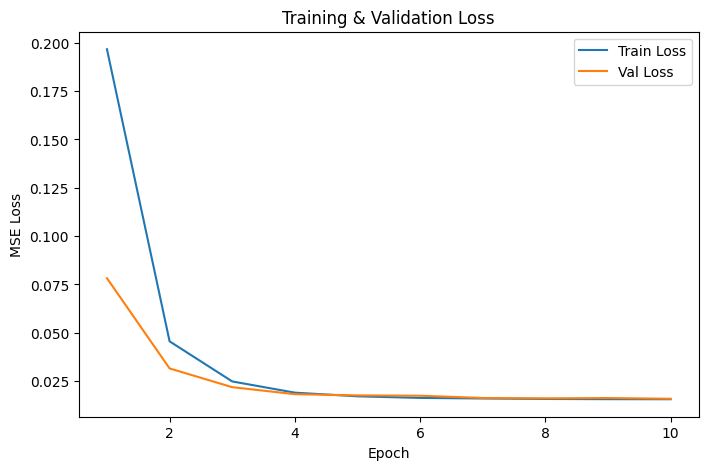

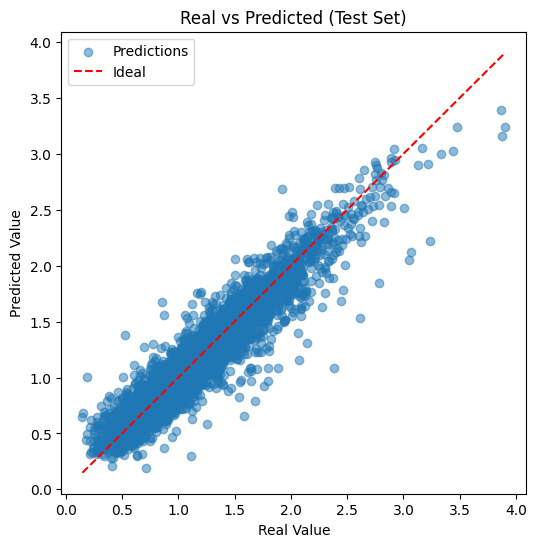

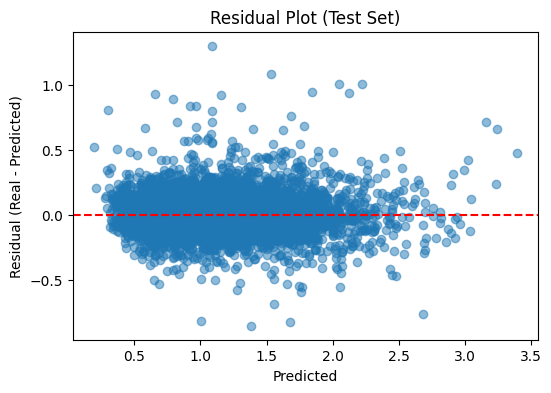

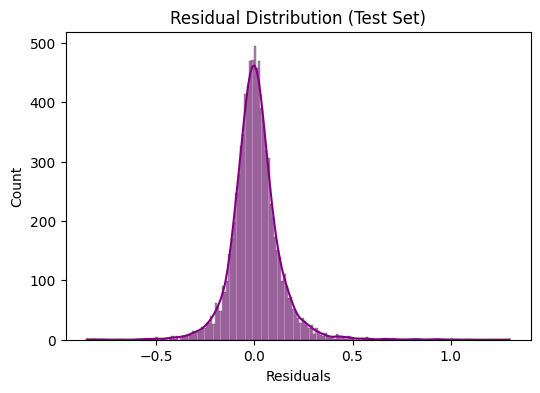

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# ===================================================
# 1. Data Preparation
# ===================================================
# We assume you have a DataFrame 'graduates_data' with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# We'll make a copy and do some cleaning/encoding.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# ---------------------------------------
# Build sequences for each row
# ---------------------------------------
def build_sequences(row):
    """
    Builds a sequence of length 4 (features) and 4 targets from a row.
    
    For each time step t = 1..4:
      Input (X_t) = [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_Pt]
      Output (Y_t) = P_WWZ_P(t+1)
    """
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    wwz_values = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    
    seq_input = []
    seq_output = []
    
    # 4 time steps => 4 input steps, 4 targets
    for t in range(4):
        year_t = t + 1
        x_t = [woj, poziom, forma, dziedz, year_t, wwz_values[t]]
        seq_input.append(x_t)
        seq_output.append(wwz_values[t + 1])  # next year's WWZ
    
    return np.array(seq_input, dtype=np.float32), np.array(seq_output, dtype=np.float32)

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim=6)
all_targets = np.array(all_targets)      # shape: (N, 4)

# ---------------------------------------
# 1.1 Three Splits: Train, Validation, Test
# ---------------------------------------
# Step 1: Split off the test set (e.g., 20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    all_sequences, all_targets,
    test_size=0.2, random_state=42
)

# Step 2: Split the remaining 80% into train/validation (e.g., 80% => 64% train, 16% val)
# So if you want 20% test, 10% val, 70% train, you can adjust:
#   For example, val_size=(0.2 / 0.8)=0.25 => 75% train, 25% val (of the leftover 80%).
val_size = 0.25  # 25% of the leftover => overall 20% test, 20% val, 60% train if you prefer
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=val_size, random_state=42
)

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")

# ===================================================
# 2. Dataset and DataLoader
# ===================================================
class GraduatesLSTMDataset(Dataset):
    """
    A custom PyTorch Dataset for LSTM-based time series.
    """
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return self.X.size(0)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Datasets for train, val, test
train_dataset = GraduatesLSTMDataset(X_train, y_train)
val_dataset   = GraduatesLSTMDataset(X_val,   y_val)
test_dataset  = GraduatesLSTMDataset(X_test,  y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

# ===================================================
# 3. LSTM Model Definition
# ===================================================
class LSTMModel(nn.Module):
    """
    A simple LSTM model for many-to-many prediction.
    The model outputs a value for each time step.
    """
    def __init__(self, input_dim, hidden_dim=64, num_layers=1):
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # batch_first=True => input shape: (batch, seq_length, input_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )
        
        # Final fully-connected layer maps hidden states to 1D output
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        """
        Forward pass through the LSTM.
        
        Args:
            x (Tensor): shape (batch_size, seq_length, input_dim)
        
        Returns:
            Tensor of shape (batch_size, seq_length).
        """
        lstm_out, (h_n, c_n) = self.lstm(x)
        out = self.fc(lstm_out)  # (batch_size, seq_length, 1)
        return out.squeeze(-1)   # (batch_size, seq_length)

# Initialize the model, loss function, and optimizer
input_dim = X_train.shape[2]  # e.g., 6
model = LSTMModel(input_dim=input_dim, hidden_dim=64, num_layers=1)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ===================================================
# 4. Model Training (Now with Validation Set)
# ===================================================
epochs = 10
train_losses = []
val_losses   = []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0.0
    
    # -----------------------------
    # Training Loop
    # -----------------------------
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        preds = model(batch_x)  # shape: (batch_size, seq_length=4)
        loss = criterion(preds, batch_y)
        
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item() * batch_x.size(0)
    
    avg_train_loss = total_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    
    # -----------------------------
    # Validation Loop
    # -----------------------------
    model.eval()
    total_val_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            preds = model(batch_x)
            val_loss = criterion(preds, batch_y)
            total_val_loss += val_loss.item() * batch_x.size(0)

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# ===================================================
# 5. Evaluation on the Test Set
# ===================================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
test_real  = torch.cat(test_y_list,   dim=0).numpy()    # shape: (N_test, 4)

# Flatten for metrics
test_preds_flat = test_preds.flatten()
test_real_flat  = test_real.flatten()

# -------------------------------------
# 5.1. Metrics
# -------------------------------------
mse  = mean_squared_error(test_real_flat, test_preds_flat)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(test_real_flat, test_preds_flat)
mape = mean_absolute_percentage_error(test_real_flat, test_preds_flat)
r2   = r2_score(test_real_flat, test_preds_flat)

print("\n*** Final Evaluation on Test Set ***")
print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")
print(f"Test MAPE: {mape:.4f}")
print(f"Test R^2:  {r2:.4f}")

# -------------------------------------
# 5.2. Plots
# -------------------------------------
# (A) Training vs Validation Loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1),   val_losses,   label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# (B) Real vs. Predicted scatter (Test Set)
plt.figure(figsize=(6,6))
plt.scatter(test_real_flat, test_preds_flat, alpha=0.5, label='Predictions')
plt.plot(
    [test_real_flat.min(), test_real_flat.max()],
    [test_real_flat.min(), test_real_flat.max()],
    'r--',
    label='Ideal'
)
plt.title("Real vs Predicted (Test Set)")
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

# (C) Residuals: Real - Predicted
residuals = test_real_flat - test_preds_flat

plt.figure(figsize=(6,4))
plt.scatter(test_preds_flat, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual (Real - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.show()

# (D) Residual Distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()

Train size: 8828
Validation size: 1103
Test size: 1104


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/10] - Train Loss: 0.0581, Val Loss: 0.0110
Epoch [2/10] - Train Loss: 0.0223, Val Loss: 0.0091
Epoch [3/10] - Train Loss: 0.0201, Val Loss: 0.0084
Epoch [4/10] - Train Loss: 0.0191, Val Loss: 0.0129
Epoch [5/10] - Train Loss: 0.0192, Val Loss: 0.0266
Epoch [6/10] - Train Loss: 0.0181, Val Loss: 0.0079
Epoch [7/10] - Train Loss: 0.0157, Val Loss: 0.0050
Epoch [8/10] - Train Loss: 0.0161, Val Loss: 0.0047
Epoch [9/10] - Train Loss: 0.0167, Val Loss: 0.0061
Epoch [10/10] - Train Loss: 0.0159, Val Loss: 0.0063

*** Final Evaluation on Test Set ***
Test MSE:  0.0056
Test RMSE: 0.0749
Test MAE:  0.0403
Test MAPE: 0.0389
Test R^2:  0.9677


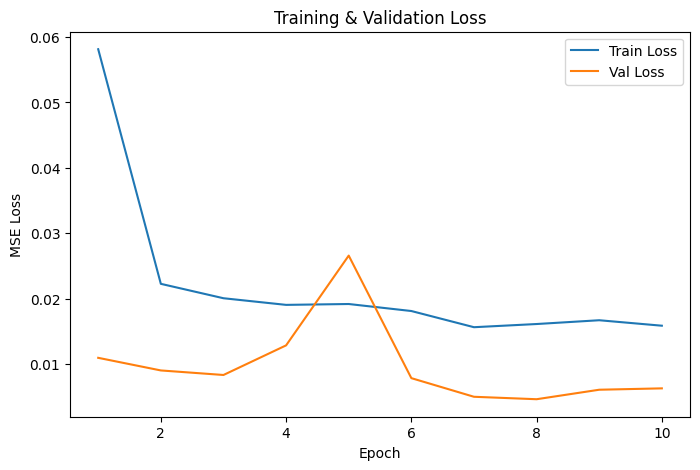

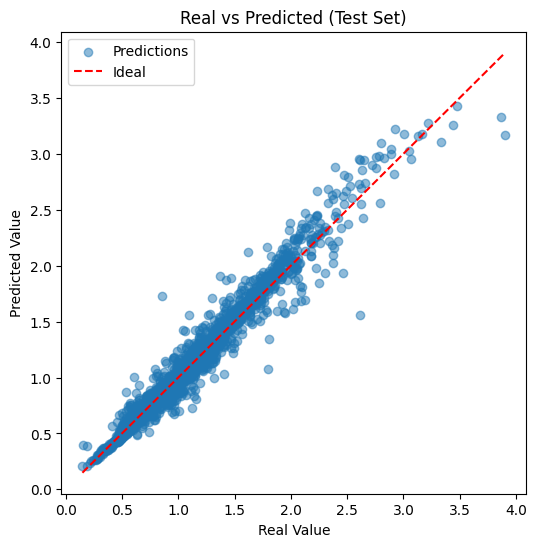

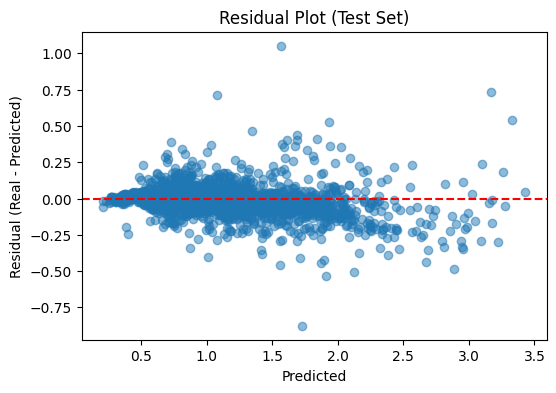

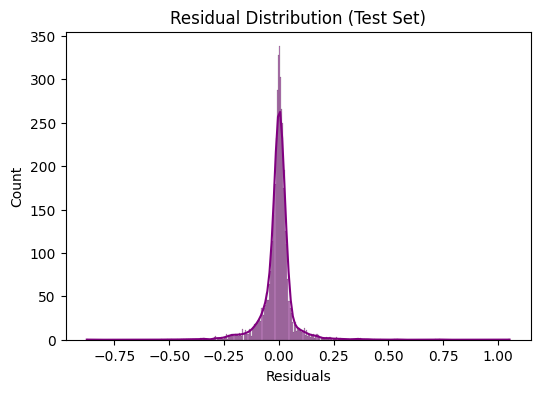


Example single row forecast for years 6..10:
Predictions for years 6..10: [2.0892105102539062, 2.0531275272369385, 2.009739398956299, 1.993896722793579, 1.9519060850143433]

Done.


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json  # if you need to load label mappings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# ===================================================
# 1. Data Preparation
# ===================================================
# We assume you have a DataFrame 'graduates_data' with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# We'll make a copy and do some cleaning/encoding.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le


# -----------------------------------------------------
# build_sequences function from your code (unchanged)
# -----------------------------------------------------
def build_sequences(row):
    """
    Builds a sequence of length 4 (features) and 4 targets from a row.
    
    For each time step t = 1..4:
      Input (X_t) = [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_Pt]
      Output (Y_t) = P_WWZ_P(t+1)
    """
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    wwz_values = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    
    seq_input = []
    seq_output = []
    
    # 4 time steps => 4 input steps, 4 targets
    for t in range(4):
        year_t = t + 1
        x_t = [woj, poziom, forma, dziedz, year_t, wwz_values[t]]
        seq_input.append(x_t)
        seq_output.append(wwz_values[t + 1])  # next year's WWZ
    
    return np.array(seq_input, dtype=np.float32), np.array(seq_output, dtype=np.float32)


# -----------------------------------------------------
# Build all_sequences / all_targets from DataFrame
# -----------------------------------------------------
all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim=6)
all_targets = np.array(all_targets)      # shape: (N, 4)

# # -----------------------------------------------------
# # 1.1 Three Splits: Train, Validation, Test
# # -----------------------------------------------------
# # Step 1: Split off the test set (e.g., 20%)
# X_temp, X_test, y_temp, y_test = train_test_split(
#     all_sequences, all_targets,
#     test_size=0.2, random_state=42
# )

# # Step 2: Split the remaining 80% into train/validation
# # e.g., 25% of X_temp => (0.8 * 0.25) = 0.2 => 20% val overall
# val_size = 0.25  
# X_train, X_val, y_train, y_val = train_test_split(
#     X_temp, y_temp,
#     test_size=val_size, random_state=42
# )

# ===========================================
# Step 1: Train/Test Split (80%/20%)
# ===========================================
X_train, X_temp, y_train, y_temp = train_test_split(
    all_sequences, all_targets,
    test_size=0.2, random_state=42
)

# ===========================================
# Step 2: Validation/Test Split (from 20%)
# ===========================================
# Divide the remaining 20% into equal halves
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42
)

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")


# ===================================================
# 2. Dataset and DataLoader
# ===================================================
class GraduatesLSTMDataset(Dataset):
    """
    A custom PyTorch Dataset for LSTM-based time series.
    """
    def __init__(self, X, y):
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return self.X.size(0)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Datasets for train, val, test
train_dataset = GraduatesLSTMDataset(X_train, y_train)
val_dataset   = GraduatesLSTMDataset(X_val,   y_val)
test_dataset  = GraduatesLSTMDataset(X_test,  y_test)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset,   batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)


# ===================================================
# 3. Advanced LSTM Model Definition (from your code)
# ===================================================
class AdvancedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=3, dropout=0.3):
        super(AdvancedLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Batch Normalization
        self.bn = nn.BatchNorm1d(input_dim)
        
        # Bidirectional LSTM with Dropout
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True
        )
        
        # Fully-connected layer
        self.fc = nn.Linear(hidden_dim * 2, 1)  # bidirectional => hidden_dim*2

    def forward(self, x):
        # x.shape => (batch_size, seq_length=4, input_dim=6)
        # 1) Apply BatchNorm across input_dim dimension
        batch_size, seq_length, input_dim = x.size()
        
        # Flatten the (batch*seq, input_dim), apply BN, then reshape
        x = self.bn(x.view(-1, input_dim)).view(batch_size, seq_length, input_dim)
        
        # 2) LSTM forward
        lstm_out, _ = self.lstm(x)  # shape => (batch_size, seq_length, hidden_dim*2)
        
        # 3) FC layer => (batch_size, seq_length, 1)
        out = self.fc(lstm_out)
        return out.squeeze(-1)  # => (batch_size, seq_length)


# Initialize model
input_dim = X_train.shape[2]  # should be 6
model = AdvancedLSTMModel(
    input_dim=input_dim, 
    hidden_dim=128, 
    num_layers=3, 
    dropout=0.3
)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', patience=5, factor=0.5, verbose=True
)


# ===================================================
# 4. Model Training (Now with Validation Set)
# ===================================================
epochs = 10
train_losses = []
val_losses   = []

for epoch in range(epochs):
    model.train()
    total_train_loss = 0.0
    
    # --- Training Loop ---
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        preds = model(batch_x)
        loss = criterion(preds, batch_y)
        
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item() * batch_x.size(0)
    
    avg_train_loss = total_train_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)

    # --- Validation Loop ---
    model.eval()
    total_val_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in val_loader:
            preds = model(batch_x)
            val_loss = criterion(preds, batch_y)
            total_val_loss += val_loss.item() * batch_x.size(0)

    avg_val_loss = total_val_loss / len(val_loader.dataset)
    val_losses.append(avg_val_loss)
    
    # Learning rate scheduler step
    scheduler.step(avg_val_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")


# ===================================================
# 5. Evaluation on the Test Set
# ===================================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape => (N_test, 4)
test_real  = torch.cat(test_y_list,   dim=0).numpy()    # shape => (N_test, 4)

# Flatten for metrics
test_preds_flat = test_preds.flatten()
test_real_flat  = test_real.flatten()

# -------------------------------------
# 5.1. Metrics
# -------------------------------------
mse  = mean_squared_error(test_real_flat, test_preds_flat)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(test_real_flat, test_preds_flat)
mape = mean_absolute_percentage_error(test_real_flat, test_preds_flat)
r2   = r2_score(test_real_flat, test_preds_flat)

print("\n*** Final Evaluation on Test Set ***")
print(f"Test MSE:  {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE:  {mae:.4f}")
print(f"Test MAPE: {mape:.4f}")
print(f"Test R^2:  {r2:.4f}")


# -------------------------------------
# 5.2. Plots
# -------------------------------------
# (A) Training vs Validation Loss over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss')
plt.plot(range(1, len(val_losses)+1),   val_losses,   label='Val Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# (B) Real vs. Predicted scatter (Test Set)
plt.figure(figsize=(6,6))
plt.scatter(test_real_flat, test_preds_flat, alpha=0.5, label='Predictions')
plt.plot(
    [test_real_flat.min(), test_real_flat.max()],
    [test_real_flat.min(), test_real_flat.max()],
    'r--',
    label='Ideal'
)
plt.title("Real vs Predicted (Test Set)")
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")
plt.legend()
plt.show()

# (C) Residuals: Real - Predicted
residuals = test_real_flat - test_preds_flat

plt.figure(figsize=(6,4))
plt.scatter(test_preds_flat, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residual (Real - Predicted)")
plt.title("Residual Plot (Test Set)")
plt.show()

# (D) Residual Distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution (Test Set)")
plt.xlabel("Residuals")
plt.ylabel("Count")
plt.show()


# ===================================================
# 6. Forecast for Future Years (Roll-Out)
# ===================================================
def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data (years 1..5).
    """
    model.eval()
    
    num_directions = 2 if model.lstm.bidirectional else 1
    h = torch.zeros(model.num_layers * num_directions, 1, model.hidden_dim)
    c = torch.zeros(model.num_layers * num_directions, 1, model.hidden_dim)
    
    # Warm up LSTM with 4 steps
    for t in range(4):
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t+1, known_wwz[t]
        ]], dtype=torch.float32).unsqueeze(0)  
        out, (h, c) = model.lstm(x_t, (h, c))
    
    wwz_5 = known_wwz[4]
    future_preds = []
    prev_wwz = wwz_5
    
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t_future, prev_wwz
        ]], dtype=torch.float32).unsqueeze(0)
        
        out, (h, c) = model.lstm(x_t, (h, c))
        pred = model.fc(out)  # (1, 1, 1)
        pred_value = pred.item()
        future_preds.append(pred_value)
        
        prev_wwz = pred_value
    
    return future_preds


def predict_future(model, row, future_years=5):
    """
    Retrieves known data (P_WWZ_P1..P5) from 'row' and calls rollout_prediction.
    """
    model.eval()
    
    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)


# Example usage:
print("\nExample single row forecast for years 6..10:")
example_row = graduates_data_copy.iloc[1000]
predicted_next_5 = predict_future(model, example_row, future_years=5)
print(f"Predictions for years 6..10: {predicted_next_5}")

# If you have label_mappings saved in JSON, you can load & invert them as you mentioned:
# with open("label_mappings.json", "r") as file:
#     label_mappings = json.load(file)
# # Example decode logic ...
# decoded_mappings = {
#     col: {int(encoded_v): orig_v for orig_v, encoded_v in mapping.items()}
#     for col, mapping in label_mappings.items()
# }

print("\nDone.")

In [22]:

# ===================================================
# 6. Forecast for Future Years (6..10) Using Roll-Out
# ===================================================

def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data (years 1..5).
    """
    model.eval()
    
    # Initialize hidden and cell states for batch_size=1
    h = torch.zeros(model.num_layers, 1, model.hidden_dim)
    c = torch.zeros(model.num_layers, 1, model.hidden_dim)
    
    # Warm up LSTM with the first 4 steps (years 1..4)
    for t in range(4):
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t+1, known_wwz[t]
        ]], dtype=torch.float32).unsqueeze(0)  # shape => (1, 1, 6)
        out, (h, c) = model.lstm(x_t, (h, c))
    
    # Now at state for year 5
    wwz_5 = known_wwz[4]
    future_preds = []
    prev_wwz = wwz_5
    
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t_future, prev_wwz
        ]], dtype=torch.float32).unsqueeze(0)  # (1, 1, 6)
        
        out, (h, c) = model.lstm(x_t, (h, c))
        pred = model.fc(out)  # shape => (1, 1, 1)
        pred_value = pred.item()
        future_preds.append(pred_value)
        
        prev_wwz = pred_value
    
    return future_preds

def predict_future(model, row, future_years=5):
    """
    Retrieves known data (P_WWZ_P1..P5) from 'row' and calls rollout_prediction.
    """
    model.eval()
    
    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)

temp_data = graduates_data_copy[graduates_data_copy['Dziedzina'] == 4]
for i in range(min(len(temp_data), 5)):  # just show a few
    predicted_next_5 = predict_future(model, temp_data.iloc[i], future_years=5)
    print(f"\nRow {i} Predictions for years 6..10:", predicted_next_5)



Row 0 Predictions for years 6..10: [1.0762826204299927, 1.067850947380066, 1.037934422492981, 0.9818428754806519, 0.9073567390441895]

Row 1 Predictions for years 6..10: [2.3143115043640137, 2.1924262046813965, 2.0675454139709473, 1.9243265390396118, 1.76543390750885]

Row 2 Predictions for years 6..10: [0.9178800582885742, 0.940382182598114, 0.9234386682510376, 0.8748447299003601, 0.8057975769042969]

Row 3 Predictions for years 6..10: [1.5517048835754395, 1.5282613039016724, 1.488869547843933, 1.4225701093673706, 1.3331385850906372]

Row 4 Predictions for years 6..10: [1.7675392627716064, 1.7589653730392456, 1.7260855436325073, 1.6482537984848022, 1.528847575187683]


## LSTM 1 warstwa original 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ============================================
# 1. Data Preparation
# ============================================
# In this example, we assume you have a DataFrame called 'graduates_data' 
# with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# You mentioned that you might have them already loaded.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim)
all_targets = np.array(all_targets)      # shape: (N, 4)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_sequences, all_targets, test_size=0.2, random_state=42
)


# ============================================
# 3. LSTM Model Definition
# ============================================
class LSTMModel(nn.Module):
    """
    A simple LSTM model for many-to-many prediction.
    The model outputs a value for each time step.
    """
    def __init__(self, input_dim, hidden_dim=64, num_layers=1):
        """
        Args:
            input_dim (int): Number of features at each time step.
            hidden_dim (int): Number of hidden units in the LSTM cell.
            num_layers (int): Number of stacked LSTM layers.
        """
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # batch_first=True => input shape: (batch, seq_length, input_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )
        
        # Final fully-connected layer maps hidden states to 1D output
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        """
        Forward pass through the LSTM.
        
        Args:
            x (Tensor): shape (batch_size, seq_length, input_dim)
        
        Returns:
            Tensor of shape (batch_size, seq_length) representing 
            predicted values at each time step.
        """
        # LSTM forward pass
        lstm_out, (h_n, c_n) = self.lstm(x)
        
        # Map each hidden state to a single output
        out = self.fc(lstm_out)  # shape: (batch_size, seq_length, 1)
        
        # Remove the last dimension
        return out.squeeze(-1)   # shape: (batch_size, seq_length)

# Define input_dim (e.g., 6: [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_t])
input_dim = X_train.shape[2]

# Initialize model, loss function, and optimizer
model = LSTMModel(input_dim=input_dim, hidden_dim=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data.
    
    Args:
        model (nn.Module): The trained LSTM model.
        known_wwz (list[float]): List of WWZ values for years 1..5.
        woj, poziom, forma, dziedz (float): Encoded categorical features.
        future_years (int): How many future years to predict (e.g., 5 => years 6..10).
    
    Returns:
        A list of predicted WWZ values for the next future_years.
    """
    model.eval()
    
    # Initialize hidden and cell states
    h = torch.zeros(model.num_layers, 1, model.hidden_dim)  # batch_size = 1
    c = torch.zeros(model.num_layers, 1, model.hidden_dim)  # batch_size = 1
    
    # "Warm up" the LSTM with years 1..4 so it reaches the state for year 5
    for t in range(4):
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t+1, known_wwz[t]
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        # Forward pass through the LSTM
        out, (h, c) = model.lstm(x_t, (h, c))
    
    # LSTM is now at the state corresponding to year 5
    wwz_5 = known_wwz[4]  # The known year-5 value
    future_preds = []
    prev_wwz = wwz_5
    
    # Predict future years (6..(5 + future_years)) iteratively
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t_future, prev_wwz
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        out, (h, c) = model.lstm(x_t, (h, c))
        pred = model.fc(out)  # shape: (1, 1, 1)
        pred_value = pred.item()
        future_preds.append(pred_value)
        
        # Update prev_wwz for the next iteration
        prev_wwz = pred_value
    
    return future_preds


def predict_future(model, row, future_years=5):
    """
    A helper function that retrieves the known data from a row,
    then calls rollout_prediction to forecast future years.
    
    Args:
        model (nn.Module): Trained LSTM model.
        row (pd.Series): A row containing 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
                         and 'P_WWZ_P1'..'P_WWZ_P5'.
        future_years (int): Number of future years to forecast.
    
    Returns:
        A list of forecasted WWZ values for the next 'future_years'.
    """
    model.eval()
    
    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)

# In this example, for each row, we have 5 time steps corresponding to:
#   P_WWZ_P1 ... P_WWZ_P5
# We will build sequences of length 4 for the model to predict the next step
# (e.g., year t+1 based on year t), a so-called "many-to-many" approach in LSTM.

def build_sequences(row):
    """
    Builds a sequence of length 4 (features) and 4 targets from a row.
    
    For each time step t = 1..4:
      Input (X_t) = [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_Pt]
      Output (Y_t) = P_WWZ_P(t+1)
    
    The result is a tuple:
      - seq_input: shape (4, input_dim)
      - seq_output: shape (4,)
    """
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    # Retrieve the 5 known WWZ values: P_WWZ_P1..P_WWZ_P5
    wwz_values = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    
    seq_input = []
    seq_output = []
    
    # Build 4 time steps: from t=1 to t=4
    for t in range(4):
        year_t = t + 1
        x_t = [woj, poziom, forma, dziedz, year_t, wwz_values[t]]
        seq_input.append(x_t)
        
        # The target is the next year's WWZ -> wwz_values[t+1]
        seq_output.append(wwz_values[t + 1])
    
    return np.array(seq_input, dtype=np.float32), np.array(seq_output, dtype=np.float32)


# ============================================
# 2. Dataset and DataLoader
# ============================================
class GraduatesLSTMDataset(Dataset):
    """
    A custom PyTorch Dataset for LSTM-based time series.
    """
    def __init__(self, X, y):
        # Convert numpy arrays to torch tensors
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = GraduatesLSTMDataset(X_train, y_train)
test_dataset  = GraduatesLSTMDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ============================================
# 4. Model Training
# ============================================
epochs = 50
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        preds = model(batch_x)  # shape: (batch_size, seq_length=4)
        
        # Compute loss
        loss = criterion(preds, batch_y)
        
        # Backprop and update
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_x.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Użycie train_loss zamiast valid_loss

    # Obliczanie straty walidacyjnej
    model.eval()
    valid_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            preds = model(batch_x)
            loss = criterion(preds, batch_y)
            valid_loss += loss.item() * batch_x.size(0)

    valid_loss /= len(test_loader.dataset)
    valid_losses.append(valid_loss)  # Dodanie valid_loss do listy strat walidacyjnych
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")

# ============================================
# 5. Evaluation on the Test Set
# ============================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

# Concatenate predictions and true values
test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
test_real = torch.cat(test_y_list, dim=0).numpy()       # shape: (N_test, 4)

# Calculate regression metrics
mae = mean_absolute_error(test_real.flatten(), test_preds.flatten())
mse = mean_squared_error(test_real.flatten(), test_preds.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(test_real.flatten(), test_preds.flatten())
mape = mean_absolute_percentage_error(test_real.flatten(), test_preds.flatten())

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(test_real.flatten(), test_preds.flatten(), alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki po ukończeniu studiów")
plt.plot(
    [test_real.flatten().min(), test_preds.flatten().max()],
    [test_real.flatten().min(), test_preds.flatten().max()],
    'r--'
)  # Line y=x
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()

# ============================================
# 6. Forecast for Future Years (e.g., 6..10)
# ============================================
# We will use "roll-out" or "iterative forecasting" to predict years beyond 5.


temp_data = graduates_data_copy[graduates_data_copy['Dziedzina'] == 4]
for i in range(len(temp_data)):
    predicted_next_5 = predict_future(model, temp_data.iloc[i], future_years=5)
    print("Predictions for years 6..10:", predicted_next_5)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_predictions(model, data, future_years=5, group_by=None, n_examples=5, mappings=None):
    """
    Wizualizuje zdolności predykcyjne modelu na podstawie rzeczywistych i przewidywanych wartości.
    Dekoduje zakodowane wartości w danych na ich rzeczywiste nazwy przed wyświetleniem.

    Args:
        model: Wytrenowany model LSTM.
        data: DataFrame z danymi (temp_data) zawierającymi rzeczywiste wartości dla lat 1-5.
        future_years: Liczba lat do przewidzenia (domyślnie 5).
        group_by: Kolumna, według której grupować dane (opcjonalnie).
        n_examples: Liczba przykładów do indywidualnej wizualizacji.
        mappings: Słownik mapujący zakodowane wartości na rzeczywiste nazwy (np. z label_mappings.json).
    """
    def decode_value(value, column, mappings):
        """Dekoduje pojedynczą wartość, jeśli istnieje mapowanie."""
        if mappings and column in mappings:
            return mappings[column].get(value, value)
        return value

    if group_by:
        groups = data.groupby(group_by)
        plt.figure(figsize=(10, 6))
        
        for name, group in groups:
            # Dekodowanie nazwy grupy
            decoded_name = decode_value(name, group_by, mappings)
            
            # Obliczanie średnich rzeczywistych i przewidywanych
            real_avg = group[[f'P_WWZ_P{i}' for i in range(1, 6)]].mean().values
            predicted_avg = []
            
            for _, row in group.iterrows():
                predicted_avg.append(predict_future(model, row, future_years=future_years))
            
            predicted_avg = np.mean(predicted_avg, axis=0)
            years = list(range(1, 6)) + list(range(6, 6 + future_years))
            trend = np.concatenate([real_avg, predicted_avg])
            
            plt.plot(years, trend, label=f'{decoded_name}')
        
        plt.xlabel("Years after graduation")
        plt.ylabel("Salary (or target variable)")
        plt.title(f"Average Trends Grouped by {group_by}")
        plt.legend()
        plt.grid()
        plt.show()
    
    # Visualize individual examples
    for i in range(min(n_examples, len(data))):
        row = data.iloc[i]
        real_values = row[[f'P_WWZ_P{i}' for i in range(1, 6)]].values
        predicted_values = predict_future(model, row, future_years=future_years)
        
        years = list(range(1, 6)) + list(range(6, 6 + future_years))
        all_values = np.concatenate([real_values, predicted_values])
        
        # Dekodowanie grupy, jeśli istnieje w mappings
        decoded_group = decode_value(row[group_by], group_by, mappings) if group_by else f"Example {i}"
        
        plt.figure(figsize=(8, 4))
        plt.plot(years, all_values, marker='o', label='Predicted Trend')
        plt.plot(range(1, 6), real_values, marker='x', label='Real Values', linestyle='dashed')
        plt.xlabel("Years after graduation")
        plt.ylabel("Salary (or target variable)")
        plt.title(f"Trend for {decoded_group}")
        plt.legend()
        plt.grid()
        plt.show()



temp_data = graduates_data_copy[graduates_data_copy['Dziedzina'] == 4]



## GRU

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ============================================
# 1. Data Preparation
# ============================================
# In this example, we assume you have a DataFrame called 'graduates_data' 
# with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# You mentioned that you might have them already loaded.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim)
all_targets = np.array(all_targets)      # shape: (N, 4)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_sequences, all_targets, test_size=0.2, random_state=42
)


# ============================================
# 3. LSTM Model Definition
# ============================================
class GRUModel(nn.Module):
    """
    A simple GRU model for many-to-many prediction.
    The model outputs a value for each time step.
    """
    def __init__(self, input_dim, hidden_dim=64, num_layers=1):
        """
        Args:
            input_dim (int): Number of features at each time step.
            hidden_dim (int): Number of hidden units in the GRU cell.
            num_layers (int): Number of stacked GRU layers.
        """
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # batch_first=True => input shape: (batch, seq_length, input_dim)
        self.gru = nn.GRU(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )
        
        # Final fully-connected layer maps hidden states to 1D output
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        """
        Forward pass through the GRU.
        
        Args:
            x (Tensor): shape (batch_size, seq_length, input_dim)
        
        Returns:
            Tensor of shape (batch_size, seq_length) representing 
            predicted values at each time step.
        """
        # GRU forward pass
        gru_out, h_n = self.gru(x)
        
        # Map each hidden state to a single output
        out = self.fc(gru_out)  # shape: (batch_size, seq_length, 1)
        
        # Remove the last dimension
        return out.squeeze(-1)   # shape: (batch_size, seq_length)


# Define input_dim (e.g., 6: [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_t])
input_dim = X_train.shape[2]

# Initialize model, loss function, and optimizer
model = GRUModel(input_dim=input_dim, hidden_dim=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ============================================
# 4. Model Training
# ============================================
epochs = 50
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        preds = model(batch_x)  # shape: (batch_size, seq_length=4)
        
        # Compute loss
        loss = criterion(preds, batch_y)
        
        # Backprop and update
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_x.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Użycie train_loss zamiast valid_loss

    # Obliczanie straty walidacyjnej
    model.eval()
    valid_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            preds = model(batch_x)
            loss = criterion(preds, batch_y)
            valid_loss += loss.item() * batch_x.size(0)

    valid_loss /= len(test_loader.dataset)
    valid_losses.append(valid_loss)  # Dodanie valid_loss do listy strat walidacyjnych
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")

# ============================================
# 5. Evaluation on the Test Set
# ============================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

# Concatenate predictions and true values
test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
test_real = torch.cat(test_y_list, dim=0).numpy()       # shape: (N_test, 4)

# Calculate regression metrics
mae = mean_absolute_error(test_real.flatten(), test_preds.flatten())
mse = mean_squared_error(test_real.flatten(), test_preds.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(test_real.flatten(), test_preds.flatten())
mape = mean_absolute_percentage_error(test_real.flatten(), test_preds.flatten())

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(test_real.flatten(), test_preds.flatten(), alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki po ukończeniu studiów")
plt.plot(
    [test_real.flatten().min(), test_preds.flatten().max()],
    [test_real.flatten().min(), test_preds.flatten().max()],
    'r--'
)  # Line y=x
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()

# ============================================
# 6. Forecast for Future Years (e.g., 6..10)
# ============================================
# We will use "roll-out" or "iterative forecasting" to predict years beyond 5.
def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data.
    
    Args:
        model (nn.Module): The trained GRU model.
        known_wwz (list[float]): List of WWZ values for years 1..5.
        woj, poziom, forma, dziedz (float): Encoded categorical features.
        future_years (int): How many future years to predict (e.g., 5 => years 6..10).
    
    Returns:
        A list of predicted WWZ values for the next future_years.
    """
    model.eval()
    
    # Initialize hidden state for GRU
    h = torch.zeros(model.num_layers, 1, model.hidden_dim)  # batch_size = 1
    
    # "Warm up" the GRU with years 1..4 so it reaches the state for year 5
    for t in range(4):
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t+1, known_wwz[t]
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        # Forward pass through the GRU
        out, h = model.gru(x_t, h)
    
    # GRU is now at the state corresponding to year 5
    wwz_5 = known_wwz[4]  # The known year-5 value
    future_preds = []
    prev_wwz = wwz_5
    
    # Predict future years (6..(5 + future_years)) iteratively
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t_future, prev_wwz
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        out, h = model.gru(x_t, h)  # Only one hidden state in GRU
        pred = model.fc(out)  # shape: (1, 1, 1)
        pred_value = pred.item()
        future_preds.append(pred_value)
        
        # Update prev_wwz for the next iteration
        prev_wwz = pred_value
    
    return future_preds


def predict_future(model, row, future_years=5):
    """
    A helper function that retrieves the known data from a row,
    then calls rollout_prediction to forecast future years.
    
    Args:
        model (nn.Module): Trained LSTM model.
        row (pd.Series): A row containing 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
                         and 'P_WWZ_P1'..'P_WWZ_P5'.
        future_years (int): Number of future years to forecast.
    
    Returns:
        A list of forecasted WWZ values for the next 'future_years'.
    """
    model.eval()
    
    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)

temp_data = graduates_data_copy[graduates_data_copy['Dziedzina'] == 4]
for i in range(len(temp_data)):
    predicted_next_5 = predict_future(model, temp_data.iloc[i], future_years=5)
    print("Predictions for years 6..10:", predicted_next_5)


In [ ]:
temp_data = graduates_data_copy[graduates_data_copy['Dziedzina'] == 4]

with open("label_mappings.json", "r") as file:
    label_mappings = json.load(file)

# Odwróć mapowania
decoded_mappings = {key: {int(value): key for key, value in mapping.items()} for key, mapping in label_mappings.items()}

visualize_predictions(
    model=model, 
    data=temp_data, 
    future_years=5, 
    group_by='Dziedzina', 
    n_examples=5, 
    mappings=decoded_mappings
)

## LSTM 3 warstwy + dropout 0.2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ============================================
# 1. Data Preparation
# ============================================
# In this example, we assume you have a DataFrame called 'graduates_data' 
# with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# You mentioned that you might have them already loaded.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim)
all_targets = np.array(all_targets)      # shape: (N, 4)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_sequences, all_targets, test_size=0.2, random_state=42
)


# ============================================
# 3. LSTM Model Definition
# ============================================
class LSTMModel(nn.Module):
    """
    A simple LSTM model for many-to-many prediction.
    The model outputs a value for each time step.
    """
    def __init__(self, input_dim, hidden_dim=64, num_layers=3):  # Increased num_layers to 3
        """
        Args:
            input_dim (int): Number of features at each time step.
            hidden_dim (int): Number of hidden units in the LSTM cell.
            num_layers (int): Number of stacked LSTM layers.
        """
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # batch_first=True => input shape: (batch, seq_length, input_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=0.2
        )
        
        # Final fully-connected layer maps hidden states to 1D output
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        """
        Forward pass through the LSTM.
        
        Args:
            x (Tensor): shape (batch_size, seq_length, input_dim)
        
        Returns:
            Tensor of shape (batch_size, seq_length) representing 
            predicted values at each time step.
        """
        # LSTM forward pass
        lstm_out, (h_n, c_n) = self.lstm(x)
        
        # Map each hidden state to a single output
        out = self.fc(lstm_out)  # shape: (batch_size, seq_length, 1)
        
        # Remove the last dimension
        return out.squeeze(-1)   # shape: (batch_size, seq_length)

# Define input_dim (e.g., 6: [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_t])
input_dim = X_train.shape[2]

# Initialize model with increased number of layers
model = LSTMModel(input_dim=input_dim, hidden_dim=64, num_layers=3)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


# ============================================
# 4. Model Training
# ============================================
epochs = 50
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        preds = model(batch_x)  # shape: (batch_size, seq_length=4)
        
        # Compute loss
        loss = criterion(preds, batch_y)
        
        # Backprop and update
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_x.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)  # Użycie train_loss zamiast valid_loss

    # Obliczanie straty walidacyjnej
    model.eval()
    valid_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            preds = model(batch_x)
            loss = criterion(preds, batch_y)
            valid_loss += loss.item() * batch_x.size(0)

    valid_loss /= len(test_loader.dataset)
    valid_losses.append(valid_loss)  # Dodanie valid_loss do listy strat walidacyjnych
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")

# ============================================
# 5. Evaluation on the Test Set
# ============================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

# Concatenate predictions and true values
test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
test_real = torch.cat(test_y_list, dim=0).numpy()       # shape: (N_test, 4)

# Calculate regression metrics
mae = mean_absolute_error(test_real.flatten(), test_preds.flatten())
mse = mean_squared_error(test_real.flatten(), test_preds.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(test_real.flatten(), test_preds.flatten())
mape = mean_absolute_percentage_error(test_real.flatten(), test_preds.flatten())

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(test_real.flatten(), test_preds.flatten(), alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki po ukończeniu studiów")
plt.plot(
    [test_real.flatten().min(), test_preds.flatten().max()],
    [test_real.flatten().min(), test_preds.flatten().max()],
    'r--'
)  # Line y=x
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()

# ============================================
# 6. Forecast for Future Years (e.g., 6..10)
# ============================================
# We will use "roll-out" or "iterative forecasting" to predict years beyond 5.
def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data.
    
    Args:
        model (nn.Module): The trained LSTM model.
        known_wwz (list[float]): List of WWZ values for years 1..5.
        woj, poziom, forma, dziedz (float): Encoded categorical features.
        future_years (int): How many future years to predict (e.g., 5 => years 6..10).
    
    Returns:
        A list of predicted WWZ values for the next future_years.
    """
    model.eval()
    
    # Initialize hidden and cell states
    h = torch.zeros(model.num_layers, 1, model.hidden_dim)  # batch_size = 1
    c = torch.zeros(model.num_layers, 1, model.hidden_dim)  # batch_size = 1
    
    # "Warm up" the LSTM with years 1..4 so it reaches the state for year 5
    for t in range(4):
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t+1, known_wwz[t]
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        # Forward pass through the LSTM
        out, (h, c) = model.lstm(x_t, (h, c))
    
    # LSTM is now at the state corresponding to year 5
    wwz_5 = known_wwz[4]  # The known year-5 value
    future_preds = []
    prev_wwz = wwz_5
    
    # Predict future years (6..(5 + future_years)) iteratively
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t_future, prev_wwz
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        out, (h, c) = model.lstm(x_t, (h, c))
        pred = model.fc(out)  # shape: (1, 1, 1)
        pred_value = pred.item()
        future_preds.append(pred_value)
        
        # Update prev_wwz for the next iteration
        prev_wwz = pred_value
    
    return future_preds

def predict_future(model, row, future_years=5):
    """
    A helper function that retrieves the known data from a row,
    then calls rollout_prediction to forecast future years.
    
    Args:
        model (nn.Module): Trained LSTM model.
        row (pd.Series): A row containing 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
                         and 'P_WWZ_P1'..'P_WWZ_P5'.
        future_years (int): Number of future years to forecast.
    
    Returns:
        A list of forecasted WWZ values for the next 'future_years'.
    """
    model.eval()
    
    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)

example_row = graduates_data_copy.iloc[1000]
print(example_row)
predicted_next_5 = predict_future(model, example_row, future_years=5)

print("Predictions for years 6..10:", predicted_next_5)


In [ ]:
temp_data = graduates_data_copy[graduates_data_copy['Dziedzina'] == 4]

with open("label_mappings.json", "r") as file:
    label_mappings = json.load(file)

# Odwróć mapowania
decoded_mappings = {key: {int(value): key for key, value in mapping.items()} for key, mapping in label_mappings.items()}

visualize_predictions(
    model=model, 
    data=temp_data, 
    future_years=5, 
    group_by='Dziedzina', 
    n_examples=5, 
    mappings=decoded_mappings
)

## LISTA 

- batch size 8 itd 
- różne modele (1 warstwa, 3 warstwy dropout 0.2, lstm + coś)
- epoki zmiana 
- wyciągnięcie przewidywań 
- wykresy do zmian 

Użycie Bidirectional LSTM.
Dodanie L2 Regularization i Dynamic Learning Rate.
Eksperymentowanie z rozmiarem sieci (hidden_dim, num_layers).
Normalizacja wejściowych danych.
Monitorowanie przeuczenia i zastosowanie technik regularizacji.

/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/10] - Train Loss: 0.0626, Valid Loss: 0.0173
Epoch [2/10] - Train Loss: 0.0264, Valid Loss: 0.0194
Epoch [3/10] - Train Loss: 0.0207, Valid Loss: 0.0132
Epoch [4/10] - Train Loss: 0.0205, Valid Loss: 0.0085
Epoch [5/10] - Train Loss: 0.0197, Valid Loss: 0.0080
Epoch [6/10] - Train Loss: 0.0177, Valid Loss: 0.0163
Epoch [7/10] - Train Loss: 0.0177, Valid Loss: 0.0184
Epoch [8/10] - Train Loss: 0.0203, Valid Loss: 0.0072
Epoch [9/10] - Train Loss: 0.0164, Valid Loss: 0.0077
Epoch [10/10] - Train Loss: 0.0165, Valid Loss: 0.0062
Test MAE: 0.0502
Test MSE: 0.0062
Test RMSE: 0.0788
Test R-squared: 0.9643
Test MAPE: 0.0570


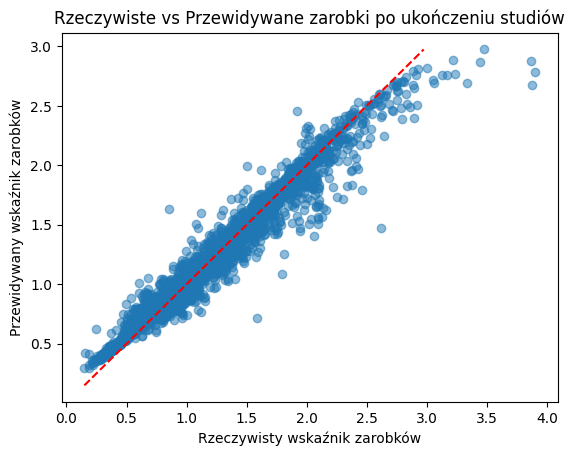

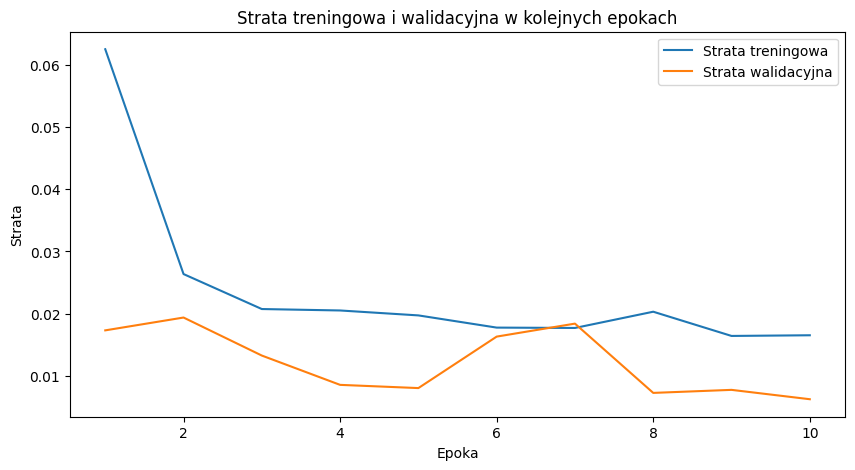

P_ROKDYP                                                                   2018
P_KIERUNEK_ID                                                              9605
P_POZIOM                                                                      1
P_FORMA                                                                       0
P_N                                                                          49
                                                    ...                        
P_POZIOM_TEKST_EN                                        Second-cycle programme
P_NAZWA_KIERUNKU_PELNA        Informatyka, studia niestacjonarne drugiego st...
P_NAZWA_KIERUNKU_PELNA_ENG    Informatyka, part-time second-cycle programme,...
P_WOJ                                                                         0
Dziedzina                                                                     4
Name: 15983, Length: 688, dtype: object
Predictions for years 6..10: [2.145761251449585, 2.2201125621795654, 2.158545255

NameError: name 'visualize_predictions' is not defined

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ============================================
# 1. Data Preparation
# ============================================
# In this example, we assume you have a DataFrame called 'graduates_data' 
# with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# You mentioned that you might have them already loaded.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim)
all_targets = np.array(all_targets)      # shape: (N, 4)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_sequences, all_targets, test_size=0.2, random_state=42
)


# ============================================
# 3. LSTM Model Definition
# ============================================
class AdvancedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=3, dropout=0.3):
        super(AdvancedLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Batch Normalization
        self.bn = nn.BatchNorm1d(input_dim)
        
        # Bidirectional LSTM with Dropout
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True
        )
        
        # Fully-connected layer
        self.fc = nn.Linear(hidden_dim * 2, 1)  # bidirectional doubles the hidden_dim

    def forward(self, x):
        # Apply Batch Normalization to the input
        batch_size, seq_length, input_dim = x.size()
        x = self.bn(x.view(-1, input_dim)).view(batch_size, seq_length, input_dim)
        
        lstm_out, _ = self.lstm(x)  # shape: (batch_size, seq_length, hidden_dim * 2)
        out = self.fc(lstm_out)    # shape: (batch_size, seq_length, 1)
        return out.squeeze(-1)     # shape: (batch_size, seq_length)


# Define input_dim (e.g., 6: [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_t])
input_dim = X_train.shape[2]

# Initialize model with BatchNorm, 3 LSTM layers, dropout, bidirectional
model = AdvancedLSTMModel(input_dim=input_dim, hidden_dim=128, num_layers=3, dropout=0.3)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

# ============================================
# 4. Model Training
# ============================================
epochs = 10
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        preds = model(batch_x)  # shape: (batch_size, seq_length=4)
        
        # Compute loss
        loss = criterion(preds, batch_y)
        
        # Backprop and update
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_x.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    # Validation loss
    model.eval()
    valid_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            preds = model(batch_x)
            loss = criterion(preds, batch_y)
            valid_loss += loss.item() * batch_x.size(0)

    valid_loss /= len(test_loader.dataset)
    valid_losses.append(valid_loss)
    
    # Step the scheduler
    scheduler.step(valid_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")

# ============================================
# 5. Evaluation on the Test Set
# ============================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

# Concatenate predictions and true values
test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
test_real = torch.cat(test_y_list, dim=0).numpy()       # shape: (N_test, 4)

# Calculate regression metrics
mae = mean_absolute_error(test_real.flatten(), test_preds.flatten())
mse = mean_squared_error(test_real.flatten(), test_preds.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(test_real.flatten(), test_preds.flatten())
mape = mean_absolute_percentage_error(test_real.flatten(), test_preds.flatten())

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(test_real.flatten(), test_preds.flatten(), alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki po ukończeniu studiów")
plt.plot(
    [test_real.flatten().min(), test_preds.flatten().max()],
    [test_real.flatten().min(), test_preds.flatten().max()],
    'r--'
)  # Line y=x
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()


# ============================================
# 6. Forecast for Future Years (e.g., 6..10)
# ============================================
# We will use "roll-out" or "iterative forecasting" to predict years beyond 5.
def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data.
    
    Args:
        model (nn.Module): The trained LSTM model.
        known_wwz (list[float]): List of WWZ values for years 1..5.
        woj, poziom, forma, dziedz (float): Encoded categorical features.
        future_years (int): How many future years to predict (e.g., 5 => years 6..10).
    
    Returns:
        A list of predicted WWZ values for the next future_years.
    """
    model.eval()
    
    # Initialize hidden and cell states
    num_directions = 2 if model.lstm.bidirectional else 1  # Bidirectional => 2 directions
    h = torch.zeros(model.num_layers * num_directions, 1, model.hidden_dim)  # (num_layers * num_directions, batch_size, hidden_dim)
    c = torch.zeros(model.num_layers * num_directions, 1, model.hidden_dim)
    
    # "Warm up" the LSTM with years 1..4 so it reaches the state for year 5
    for t in range(4):
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t+1, known_wwz[t]
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        # Forward pass through the LSTM
        out, (h, c) = model.lstm(x_t, (h, c))
    
    # LSTM is now at the state corresponding to year 5
    wwz_5 = known_wwz[4]  # The known year-5 value
    future_preds = []
    prev_wwz = wwz_5
    
    # Predict future years (6..(5 + future_years)) iteratively
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t_future, prev_wwz
        ]], dtype=torch.float32).unsqueeze(0)  # batch_size = 1
        
        out, (h, c) = model.lstm(x_t, (h, c))
        pred = model.fc(out)  # shape: (1, 1, 1)
        pred_value = pred.item()
        future_preds.append(pred_value)
        
        # Update prev_wwz for the next iteration
        prev_wwz = pred_value
    
    return future_preds


def predict_future(model, row, future_years=5):
    """
    A helper function that retrieves the known data from a row,
    then calls rollout_prediction to forecast future years.
    
    Args:
        model (nn.Module): Trained LSTM model.
        row (pd.Series): A row containing 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
                         and 'P_WWZ_P1'..'P_WWZ_P5'.
        future_years (int): Number of future years to forecast.
    
    Returns:
        A list of forecasted WWZ values for the next 'future_years'.
    """
    model.eval()
    
    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)

example_row = graduates_data_copy.iloc[1000]
print(example_row)
predicted_next_5 = predict_future(model, example_row, future_years=5)

print("Predictions for years 6..10:", predicted_next_5)

temp_data = graduates_data_copy[graduates_data_copy['Dziedzina'] == 4]

with open("label_mappings.json", "r") as file:
    label_mappings = json.load(file)

# Odwróć mapowania
decoded_mappings = {key: {int(value): key for key, value in mapping.items()} for key, mapping in label_mappings.items()}

visualize_predictions(
    model=model, 
    data=temp_data, 
    future_years=5, 
    group_by='Dziedzina', 
    n_examples=5, 
    mappings=decoded_mappings
)

# EPOCHS

c:\Users\Omen\OneDrive\Desktop\upload\ela_analysis\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/10] - Train Loss: 0.0545, Valid Loss: 0.0157
Epoch [2/10] - Train Loss: 0.0243, Valid Loss: 0.0111
Epoch [3/10] - Train Loss: 0.0210, Valid Loss: 0.0109
Epoch [4/10] - Train Loss: 0.0205, Valid Loss: 0.0078
Epoch [5/10] - Train Loss: 0.0170, Valid Loss: 0.0084
Epoch [6/10] - Train Loss: 0.0170, Valid Loss: 0.0066
Epoch [7/10] - Train Loss: 0.0156, Valid Loss: 0.0076
Epoch [8/10] - Train Loss: 0.0151, Valid Loss: 0.0083
Epoch [9/10] - Train Loss: 0.0146, Valid Loss: 0.0058
Epoch [10/10] - Train Loss: 0.0146, Valid Loss: 0.0081
Test MAE: 0.0562
Test MSE: 0.0081
Test RMSE: 0.0901
Test R-squared: 0.9533
Test MAPE: 0.0503


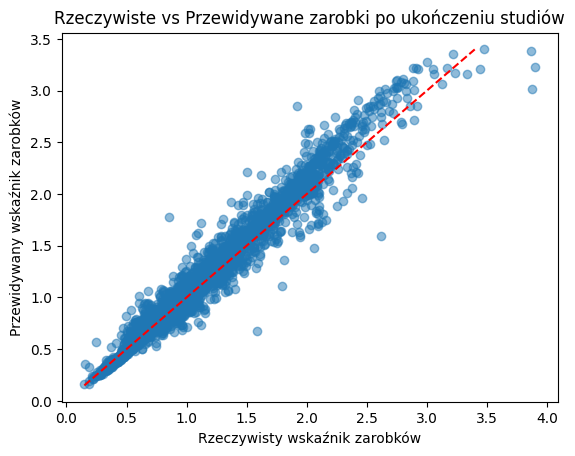

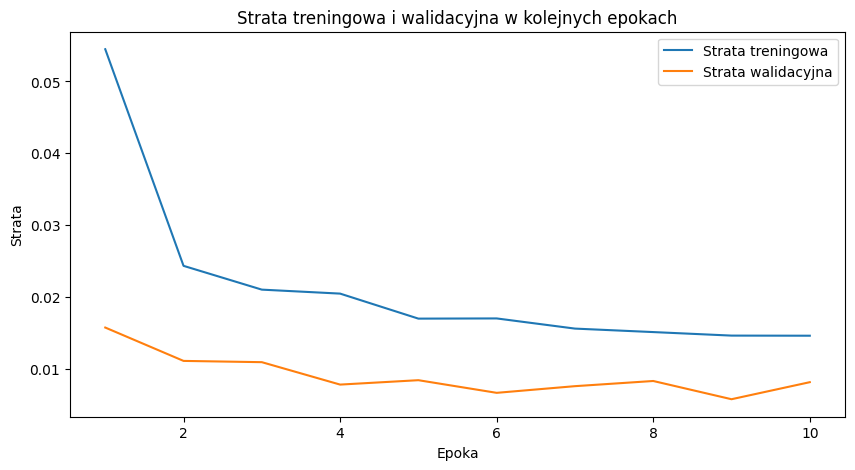

c:\Users\Omen\OneDrive\Desktop\upload\ela_analysis\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/20] - Train Loss: 0.0521, Valid Loss: 0.0117
Epoch [2/20] - Train Loss: 0.0237, Valid Loss: 0.0152
Epoch [3/20] - Train Loss: 0.0203, Valid Loss: 0.0168
Epoch [4/20] - Train Loss: 0.0204, Valid Loss: 0.0105
Epoch [5/20] - Train Loss: 0.0179, Valid Loss: 0.0079
Epoch [6/20] - Train Loss: 0.0180, Valid Loss: 0.0079
Epoch [7/20] - Train Loss: 0.0171, Valid Loss: 0.0055
Epoch [8/20] - Train Loss: 0.0167, Valid Loss: 0.0064
Epoch [9/20] - Train Loss: 0.0148, Valid Loss: 0.0049
Epoch [10/20] - Train Loss: 0.0171, Valid Loss: 0.0046
Epoch [11/20] - Train Loss: 0.0148, Valid Loss: 0.0058
Epoch [12/20] - Train Loss: 0.0167, Valid Loss: 0.0065
Epoch [13/20] - Train Loss: 0.0155, Valid Loss: 0.0083
Epoch [14/20] - Train Loss: 0.0155, Valid Loss: 0.0052
Epoch [15/20] - Train Loss: 0.0140, Valid Loss: 0.0098
Epoch [16/20] - Train Loss: 0.0151, Valid Loss: 0.0050
Epoch [17/20] - Train Loss: 0.0145, Valid Loss: 0.0055
Epoch [18/20] - Train Loss: 0.0143, Valid Loss: 0.0052
Epoch [19/20] - Tra

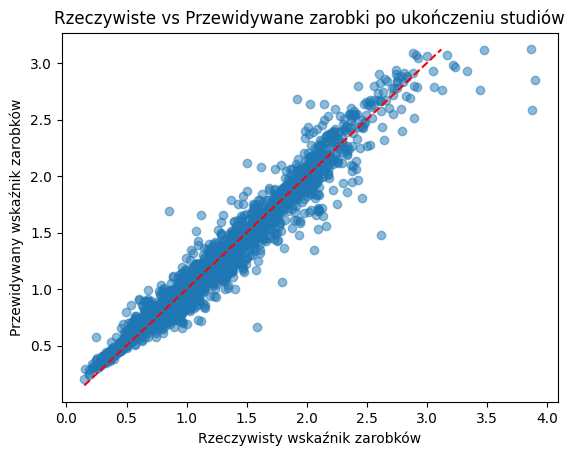

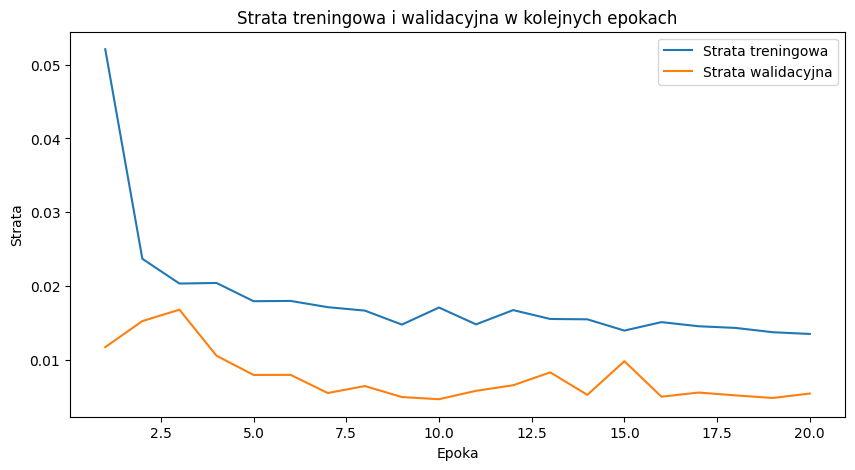

c:\Users\Omen\OneDrive\Desktop\upload\ela_analysis\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/30] - Train Loss: 0.0504, Valid Loss: 0.0189
Epoch [2/30] - Train Loss: 0.0258, Valid Loss: 0.0099
Epoch [3/30] - Train Loss: 0.0223, Valid Loss: 0.0197
Epoch [4/30] - Train Loss: 0.0227, Valid Loss: 0.0080
Epoch [5/30] - Train Loss: 0.0174, Valid Loss: 0.0070
Epoch [6/30] - Train Loss: 0.0165, Valid Loss: 0.0055
Epoch [7/30] - Train Loss: 0.0178, Valid Loss: 0.0058
Epoch [8/30] - Train Loss: 0.0159, Valid Loss: 0.0052
Epoch [9/30] - Train Loss: 0.0159, Valid Loss: 0.0083
Epoch [10/30] - Train Loss: 0.0157, Valid Loss: 0.0071
Epoch [11/30] - Train Loss: 0.0151, Valid Loss: 0.0059
Epoch [12/30] - Train Loss: 0.0174, Valid Loss: 0.0050
Epoch [13/30] - Train Loss: 0.0153, Valid Loss: 0.0060
Epoch [14/30] - Train Loss: 0.0160, Valid Loss: 0.0066
Epoch [15/30] - Train Loss: 0.0149, Valid Loss: 0.0054
Epoch [16/30] - Train Loss: 0.0161, Valid Loss: 0.0074
Epoch [17/30] - Train Loss: 0.0148, Valid Loss: 0.0057
Epoch [18/30] - Train Loss: 0.0176, Valid Loss: 0.0067
Epoch [19/30] - Tra

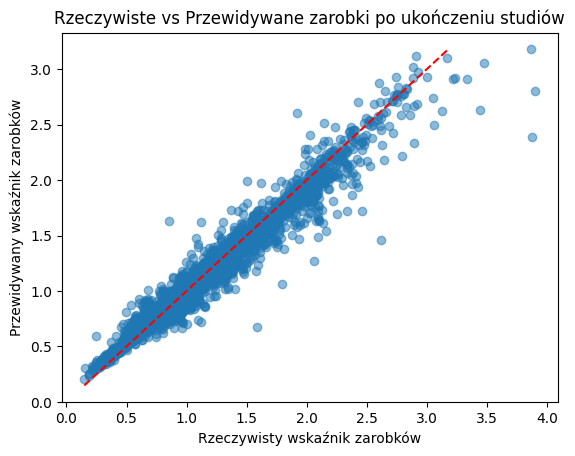

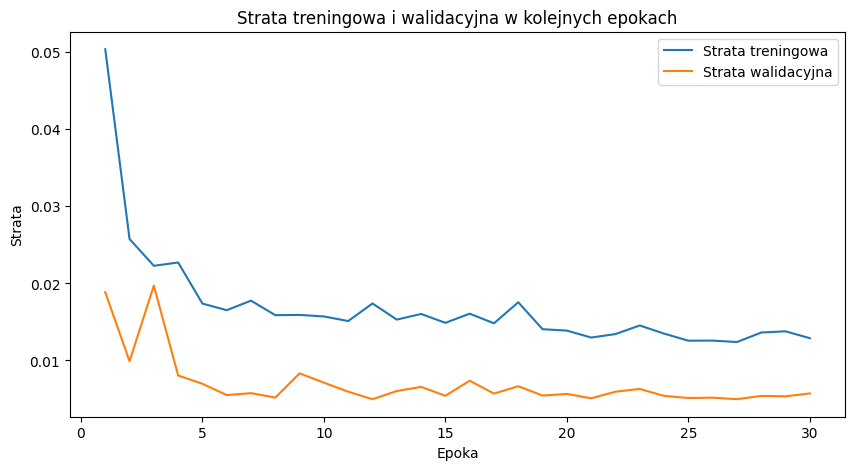

c:\Users\Omen\OneDrive\Desktop\upload\ela_analysis\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50] - Train Loss: 0.0512, Valid Loss: 0.0116
Epoch [2/50] - Train Loss: 0.0228, Valid Loss: 0.0100
Epoch [3/50] - Train Loss: 0.0221, Valid Loss: 0.0082
Epoch [4/50] - Train Loss: 0.0187, Valid Loss: 0.0136
Epoch [5/50] - Train Loss: 0.0193, Valid Loss: 0.0068
Epoch [6/50] - Train Loss: 0.0165, Valid Loss: 0.0079
Epoch [7/50] - Train Loss: 0.0179, Valid Loss: 0.0071
Epoch [8/50] - Train Loss: 0.0151, Valid Loss: 0.0053
Epoch [9/50] - Train Loss: 0.0167, Valid Loss: 0.0054
Epoch [10/50] - Train Loss: 0.0149, Valid Loss: 0.0056
Epoch [11/50] - Train Loss: 0.0140, Valid Loss: 0.0074
Epoch [12/50] - Train Loss: 0.0150, Valid Loss: 0.0081
Epoch [13/50] - Train Loss: 0.0153, Valid Loss: 0.0070
Epoch [14/50] - Train Loss: 0.0148, Valid Loss: 0.0070
Epoch [15/50] - Train Loss: 0.0140, Valid Loss: 0.0050
Epoch [16/50] - Train Loss: 0.0134, Valid Loss: 0.0049
Epoch [17/50] - Train Loss: 0.0136, Valid Loss: 0.0053
Epoch [18/50] - Train Loss: 0.0139, Valid Loss: 0.0054
Epoch [19/50] - Tra

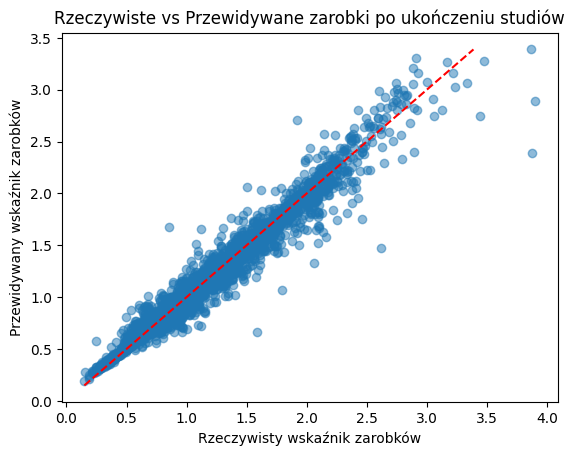

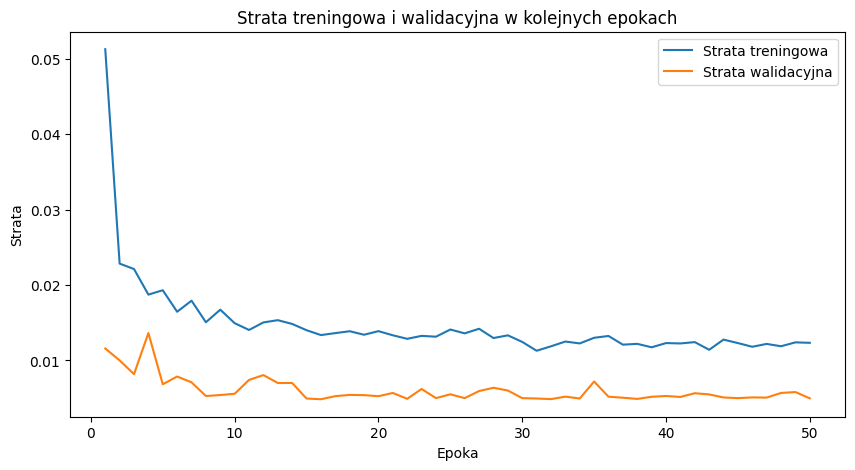

In [83]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ============================================
# 1. Data Preparation
# ============================================
# In this example, we assume you have a DataFrame called 'graduates_data' 
# with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# You mentioned that you might have them already loaded.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim)
all_targets = np.array(all_targets)      # shape: (N, 4)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_sequences, all_targets, test_size=0.2, random_state=42
)


# ============================================
# 3. LSTM Model Definition
# ============================================
class AdvancedLSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, num_layers=3, dropout=0.3):
        super(AdvancedLSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # Batch Normalization
        self.bn = nn.BatchNorm1d(input_dim)
        
        # Bidirectional LSTM with Dropout
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout,
            bidirectional=True
        )
        
        # Fully-connected layer
        self.fc = nn.Linear(hidden_dim * 2, 1)  # bidirectional doubles the hidden_dim

    def forward(self, x):
        # Apply Batch Normalization to the input
        batch_size, seq_length, input_dim = x.size()
        x = self.bn(x.view(-1, input_dim)).view(batch_size, seq_length, input_dim)
        
        lstm_out, _ = self.lstm(x)  # shape: (batch_size, seq_length, hidden_dim * 2)
        out = self.fc(lstm_out)    # shape: (batch_size, seq_length, 1)
        return out.squeeze(-1)     # shape: (batch_size, seq_length)

# Define input_dim (e.g., 6: [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_t])
input_dim = X_train.shape[2]

epochs_list = [10, 20, 30, 50]
train_losses = []
valid_losses = []
for epochs in epochs_list:

    # Initialize model with BatchNorm, 3 LSTM layers, dropout, bidirectional
    model = AdvancedLSTMModel(input_dim=input_dim, hidden_dim=128, num_layers=3, dropout=0.3)

    # Loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = optim.AdamW(model.parameters(), lr=0.001)

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)

    # ============================================
    # 4. Model Training
    # ============================================

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        
        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()
            
            # Forward pass
            preds = model(batch_x)  # shape: (batch_size, seq_length=4)
            
            # Compute loss
            loss = criterion(preds, batch_y)
            
            # Backprop and update
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item() * batch_x.size(0)
        
        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation loss
        model.eval()
        valid_loss = 0.0
        
        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                preds = model(batch_x)
                loss = criterion(preds, batch_y)
                valid_loss += loss.item() * batch_x.size(0)

        valid_loss /= len(test_loader.dataset)
        valid_losses.append(valid_loss)
        
        # Step the scheduler
        scheduler.step(valid_loss)
        
        print(f"Epoch [{epoch+1}/{epochs}] - "
            f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")

    # ============================================
    # 5. Evaluation on the Test Set
    # ============================================
    model.eval()
    test_preds_list = []
    test_y_list = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            preds = model(batch_x)
            test_preds_list.append(preds)
            test_y_list.append(batch_y)

    # Concatenate predictions and true values
    test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
    test_real = torch.cat(test_y_list, dim=0).numpy()       # shape: (N_test, 4)

    # Calculate regression metrics
    mae = mean_absolute_error(test_real.flatten(), test_preds.flatten())
    mse = mean_squared_error(test_real.flatten(), test_preds.flatten())
    rmse = np.sqrt(mse)
    r2 = r2_score(test_real.flatten(), test_preds.flatten())
    mape = mean_absolute_percentage_error(test_real.flatten(), test_preds.flatten())

    print(f"Test MAE: {mae:.4f}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R-squared: {r2:.4f}")
    print(f"Test MAPE: {mape:.4f}")

    plt.scatter(test_real.flatten(), test_preds.flatten(), alpha=0.5)
    plt.xlabel("Rzeczywisty wskaźnik zarobków")
    plt.ylabel("Przewidywany wskaźnik zarobków")
    plt.title(f"Rzeczywiste vs Przewidywane zarobki po ukończeniu studiów")
    plt.plot(
        [test_real.flatten().min(), test_preds.flatten().max()],
        [test_real.flatten().min(), test_preds.flatten().max()],
        'r--'
    )  # Line y=x
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
    plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
    plt.xlabel("Epoka")
    plt.ylabel("Strata")
    plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
    plt.legend()
    plt.show()

    train_losses = []
    valid_losses = []

# BATCH

In [84]:
import matplotlib.pyplot as plt

# ============================================
# Iterate over batch sizes
# ============================================
batch_sizes = [8, 16, 32, 64]
results = {}
epochs = 10

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    
    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    # Reinitialize model, optimizer, and scheduler for each batch size
    model = AdvancedLSTMModel(input_dim=input_dim, hidden_dim=128, num_layers=3, dropout=0.3)
    optimizer = optim.AdamW(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=5, factor=0.5, verbose=True)
    
    # Train and validate
    train_losses = []
    valid_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0.0

        for batch_x, batch_y in train_loader:
            optimizer.zero_grad()

            # Forward pass
            preds = model(batch_x)

            # Compute loss
            loss = criterion(preds, batch_y)

            # Backprop and update
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * batch_x.size(0)

        train_loss /= len(train_loader.dataset)
        train_losses.append(train_loss)

        # Validation loss
        model.eval()
        valid_loss = 0.0

        with torch.no_grad():
            for batch_x, batch_y in test_loader:
                preds = model(batch_x)
                loss = criterion(preds, batch_y)
                valid_loss += loss.item() * batch_x.size(0)

        valid_loss /= len(test_loader.dataset)
        valid_losses.append(valid_loss)

        # Step the scheduler
        scheduler.step(valid_loss)

        print(f"Epoch [{epoch+1}/{epochs}] - "
              f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")
    
    # Evaluation on test set
    model.eval()
    test_preds_list = []
    test_y_list = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            preds = model(batch_x)
            test_preds_list.append(preds)
            test_y_list.append(batch_y)

    test_preds = torch.cat(test_preds_list, dim=0).numpy()
    test_real = torch.cat(test_y_list, dim=0).numpy()

    mae = mean_absolute_error(test_real.flatten(), test_preds.flatten())
    mse = mean_squared_error(test_real.flatten(), test_preds.flatten())
    rmse = np.sqrt(mse)
    r2 = r2_score(test_real.flatten(), test_preds.flatten())
    mape = mean_absolute_percentage_error(test_real.flatten(), test_preds.flatten())

    results[batch_size] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape,
        'Train Losses': train_losses,
        'Valid Losses': valid_losses,
        'Test Predictions': test_preds,
        'Test Real': test_real
    }

    print(f"Results for batch size {batch_size}: "
          f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}, MAPE: {mape:.4f}")

    # ============================================
    # Generate Plots for Each Batch Size
    # ============================================
    # Loss plots
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Validation Loss')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Training and Validation Loss (Batch Size {batch_size})")
    plt.legend()
    plt.show()

    # Predicted vs Actual scatter plot
    plt.scatter(test_real.flatten(), test_preds.flatten(), alpha=0.5)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted Values (Batch Size {batch_size})")
    plt.plot(
        [test_real.flatten().min(), test_preds.flatten().max()],
        [test_real.flatten().min(), test_preds.flatten().max()],
        'r--'
    )  # Line y=x
    plt.show()

# ============================================
# Summarize Results
# ============================================
for batch_size, metrics in results.items():
    print(f"Batch Size: {batch_size}")
    print(f"  Test MAE: {metrics['MAE']:.4f}")
    print(f"  Test MSE: {metrics['MSE']:.4f}")
    print(f"  Test RMSE: {metrics['RMSE']:.4f}")
    print(f"  Test R2: {metrics['R2']:.4f}")
    print(f"  Test MAPE: {metrics['MAPE']:.4f}")


Training with batch size: 8


c:\Users\Omen\OneDrive\Desktop\upload\ela_analysis\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50] - Train Loss: 0.0561, Valid Loss: 0.0193
Epoch [2/50] - Train Loss: 0.0414, Valid Loss: 0.0187
Epoch [3/50] - Train Loss: 0.0387, Valid Loss: 0.0108
Epoch [4/50] - Train Loss: 0.0374, Valid Loss: 0.0102
Epoch [5/50] - Train Loss: 0.0364, Valid Loss: 0.0081
Epoch [6/50] - Train Loss: 0.0368, Valid Loss: 0.0105
Epoch [7/50] - Train Loss: 0.0355, Valid Loss: 0.0139
Epoch [8/50] - Train Loss: 0.0354, Valid Loss: 0.0129
Epoch [9/50] - Train Loss: 0.0363, Valid Loss: 0.0104
Epoch [10/50] - Train Loss: 0.0327, Valid Loss: 0.0108
Epoch [11/50] - Train Loss: 0.0333, Valid Loss: 0.0153
Epoch [12/50] - Train Loss: 0.0312, Valid Loss: 0.0103
Epoch [13/50] - Train Loss: 0.0323, Valid Loss: 0.0105
Epoch [14/50] - Train Loss: 0.0307, Valid Loss: 0.0089
Epoch [15/50] - Train Loss: 0.0319, Valid Loss: 0.0091
Epoch [16/50] - Train Loss: 0.0313, Valid Loss: 0.0105
Epoch [17/50] - Train Loss: 0.0313, Valid Loss: 0.0253
Epoch [18/50] - Train Loss: 0.0304, Valid Loss: 0.0152
Epoch [19/50] - Tra

KeyboardInterrupt: 